In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

# Prova1:2h
# 1) Lettura dataset
# 2) EDA - plot 
# 3) Correlation matrix
# 4) fit modello -  valutazione errori
# 5) salvataggio modello

# Prova2:2h
# 1) creazione repository github
# 2) creazione frontend streamlit 
# 3) visualizzazione di correlation matrix su streamlit
# 4) Inference del modello salvato su file
# 5) deployment CI/CD streamlit.io

In [2]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/formart_house.csv"
dataf = pd.read_csv(path)
dataf

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [3]:
dataf = dataf.iloc[:-1].astype(float)
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
dataf.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: title={'center': 'prova'}>

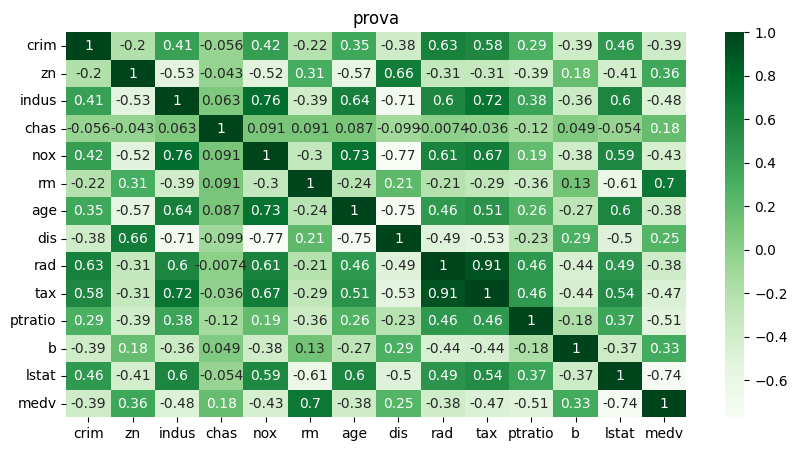

In [5]:
plt.figure(figsize=(10,5))
plt.title("prova")
sns.heatmap(dataf.corr(), annot=True, cmap="Greens")

In [6]:
X = dataf.drop("medv", axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
y = dataf["medv"]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 667)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
model.coef_

array([-9.62573031e-02,  5.36358855e-02,  1.92274224e-02,  2.11621572e+00,
       -1.38691006e+01,  3.67710727e+00, -7.11730538e-04, -1.48933517e+00,
        3.18447363e-01, -1.54217765e-02, -8.39888443e-01,  9.88534046e-03,
       -5.76109967e-01])

In [11]:
model.intercept_

34.62675024416093

In [12]:
y_pred = model.predict(X_test)
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,22.057837,18.7
1,19.843660,18.5
2,32.164167,29.8
3,9.499765,9.7
4,21.602101,21.7
...,...,...
97,19.030534,27.5
98,24.509224,21.4
99,15.822339,15.6
100,24.871602,29.6


In [13]:
residuals_dataf = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
residuals_dataf['error'] = residuals_dataf['real'] - residuals_dataf['predicted']
residuals_dataf

,predicted,real,error
0,22.057837,18.7,-3.357837
1,19.843660,18.5,-1.343660
2,32.164167,29.8,-2.364167
3,9.499765,9.7,0.200235
4,21.602101,21.7,0.097899
...,...,...,...
97,19.030534,27.5,8.469466
98,24.509224,21.4,-3.109224
99,15.822339,15.6,-0.222339
100,24.871602,29.6,4.728398


In [14]:

## 5 -  Misurare l'errore del mio modello
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2_score: ', r2score)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2_score:  0.6649019242096066
MAE:  3.758973981895195
MSE:  29.975136130831217
RMSE:  5.474955354231779


In [15]:
import joblib

## to save a model
joblib.dump(model,'reg_prova.pkl')

['reg_prova.pkl']

In [16]:
## to load model
newmodel = joblib.load('reg_prova.pkl')
newmodel

LinearRegression()

In [17]:
newmodel.predict([[0.00632,18.0,	2.31,	0,	0.538,	6.575,	65.2,	4.09,	1,	296, 15.3,	396.9,	4.98	]])[0]

c:\Users\libero.bo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.171394033896206